In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle

In [2]:
from ann import *

## Read Data

In [3]:
X_train, y_train = read_bank_note(test=False)
X_test, y_test = read_bank_note(test=True)

In [4]:
N, D = X_train.shape

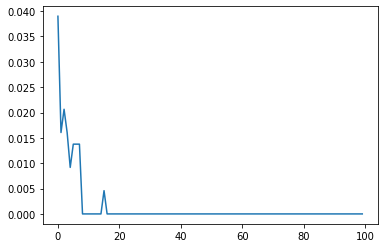

0.0


In [10]:
nn = ArtificialNeuralNet(input_dim=D, hidden_dim=[5, 5], output_dim=1, gamma0=1e-2, d=1e-1)
nn.fit(X_train, y_train)

plt.plot(nn.loss)
plt.show()

print(get_error(nn.predict(X_train), y_train))

## ANN Performance With Gaussian Initialization

In [6]:
loss_all=[]
error_train=[]
error_test=[]

width = [5, 10, 25, 50, 100]

for w in width:
    
    print(f"Starting width {w}")
    
    nn = ArtificialNeuralNet(input_dim=D, hidden_dim=[w, w], output_dim=1, gamma0=1e-2, d=1e-1)
    nn.fit(X_train, y_train)
    
    y_pred = nn.predict(X_train)
    err_train = get_error(y_pred, y_train)
    
    y_pred = nn.predict(X_test)
    err_test = get_error(y_pred, y_test)
    
    loss_all.append(nn.loss)
    error_train.append(err_train)
    error_test.append(err_test)

Starting width 5
Starting width 10
Starting width 25
Starting width 50
Starting width 100


In [7]:
df_results = pd.DataFrame({'Width': width, 'TrainError': error_train, 'TestError': err_test})
df_results

,Width,TrainError,TestError
0,5,0.008028,0.0
1,10,0.000000,0.0
2,25,0.000000,0.0
3,50,0.000000,0.0
4,100,0.000000,0.0


In [ ]:
# df_results.to_csv('results_nn.csv', index=False)

## ANN Performance With Zeros Initialization

In [12]:
loss_all=[]
error_train=[]
error_test=[]

width = [5, 10, 25, 50, 100]

for w in width:
    
    print(f"Starting width {w}")
    
    nn = ArtificialNeuralNet(input_dim=D, hidden_dim=[w, w], output_dim=1, gamma0=1e-2, d=1e-1, zero_weights=True)
    nn.fit(X_train, y_train)
    
    y_pred = nn.predict(X_train)
    err_train = get_error(y_pred, y_train)
    
    y_pred = nn.predict(X_test)
    err_test = get_error(y_pred, y_test)
    
    loss_all.append(nn.loss)
    error_train.append(err_train)
    error_test.append(err_test)

Starting width 5
Starting width 10
Starting width 25
Starting width 50
Starting width 100


In [13]:
df_results = pd.DataFrame({'Width': width, 'TrainError': error_train, 'TestError': err_test})
df_results

,Width,TrainError,TestError
0,5,0.009174,0.022
1,10,0.016055,0.022
2,25,0.018349,0.022
3,50,0.017202,0.022
4,100,0.024083,0.022


In [14]:
# df_results.to_csv('results_nn_zeros.csv', index=False)